<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


In [1]:
# Install the required libraries
!pip install -U scikit-learn
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
      Successfully uninstalled scikit-learn-1.5.1


## Import the required libraries


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the Dataset


Reading the chosen dataset into pandas dataframe:


In [3]:
dataset=pd.read_csv('heart.csv')

The dataset can be found at - "https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction"

# 1. About the Data


Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model of Classification can be of great help to understand the risk.

This data has been recorded from Cleveland, Hungary, Switzerland, Long Beach, and Stalog (Heart) Dataset

In [4]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Here,

   1. Age: age of the patient
   2. Sex: sex of the patient
   3. ChestPainType: chest pain type
   4. RestingBP: resting blood pressure [mm Hg]
   5. Cholesterol: serum cholesterol [mm/dl]
   6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
   7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
   8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
   9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
   10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
   11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
   12. HeartDisease: output class [1: heart disease, 0: Normal]



In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
dataset.shape

(918, 12)

The dataset contains 31 attributes with 119040 instances in total

In [7]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

We see that there are no null values in the dataset

In [8]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Axes: >

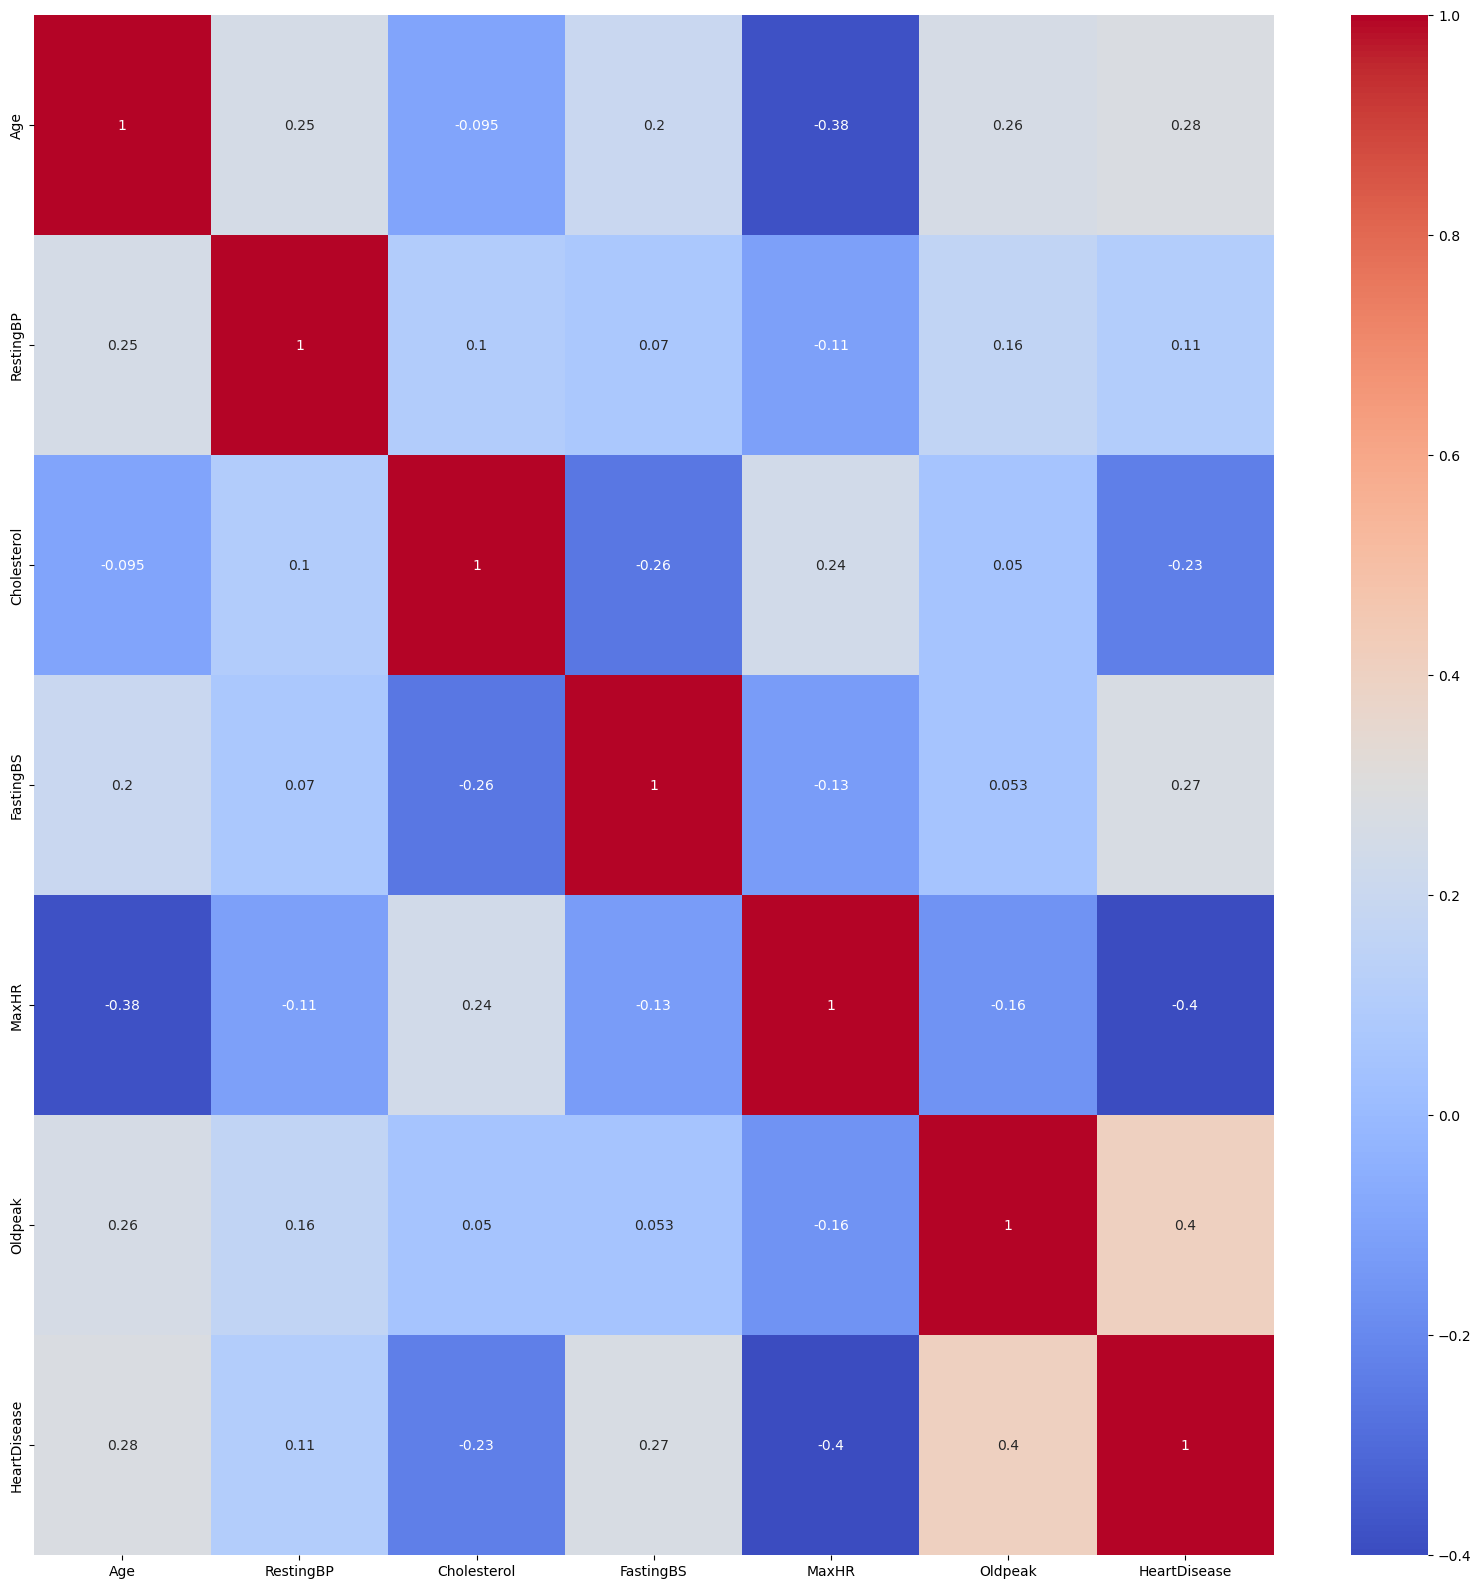

In [9]:
data=dataset.select_dtypes(include='number')

plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

The heatmap shows us the correlation of each attribute with each other,ie., how much are they dependent on each other.

However, the blank attributes refer to NaN values which we did not correct.

In [10]:
dataset.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

# 2. Objectives


The objective of the classification analysis for this dataset is to develop a machine learning model to predict the likelihood of cardiovascular disease (CVD) or heart disease in individuals based on the provided 11 features.
We also analyze the relationships between risk factors (e.g., hypertension, diabetes, hyperlipidemia) and cardiovascular outcomes, and identify the most influential features contributing to heart disease, guiding public health initiatives.

# 3. Classification Models

In [11]:
y=data['HeartDisease'] #target variable
dataset=dataset.drop('HeartDisease',axis=1)

We see that some identifying features are categorical in nature, and so needs to be encoded

In [12]:
for col in dataset.select_dtypes(include='object'):
    print(f"Values in {col}: {dataset[col].unique()}")

Values in Sex: ['M' 'F']
Values in ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
Values in RestingECG: ['Normal' 'ST' 'LVH']
Values in ExerciseAngina: ['N' 'Y']
Values in ST_Slope: ['Up' 'Flat' 'Down']


In [13]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

cat_cols=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

for cols in cat_cols:
    dataset[cols]=le.fit_transform(dataset[cols])

We encoded the categorical features using Label Encoder

In [14]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


We now need to know if our data needs to be scaled. 

For this, we calculate the summary statistics

In [15]:
dataset.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000


<Axes: >

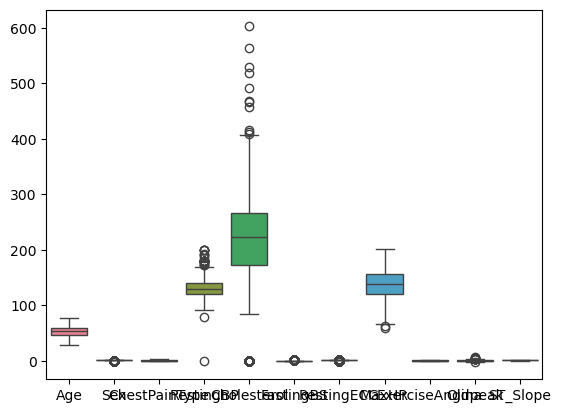

In [16]:
plt.plot(figsize=(40,20))
sns.boxplot(dataset)

In [17]:
from sklearn.preprocessing import MinMaxScaler

min_max=MinMaxScaler()
dataset=min_max.fit_transform(dataset)

In [18]:
cols=['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

<Figure size 2000x2000 with 0 Axes>

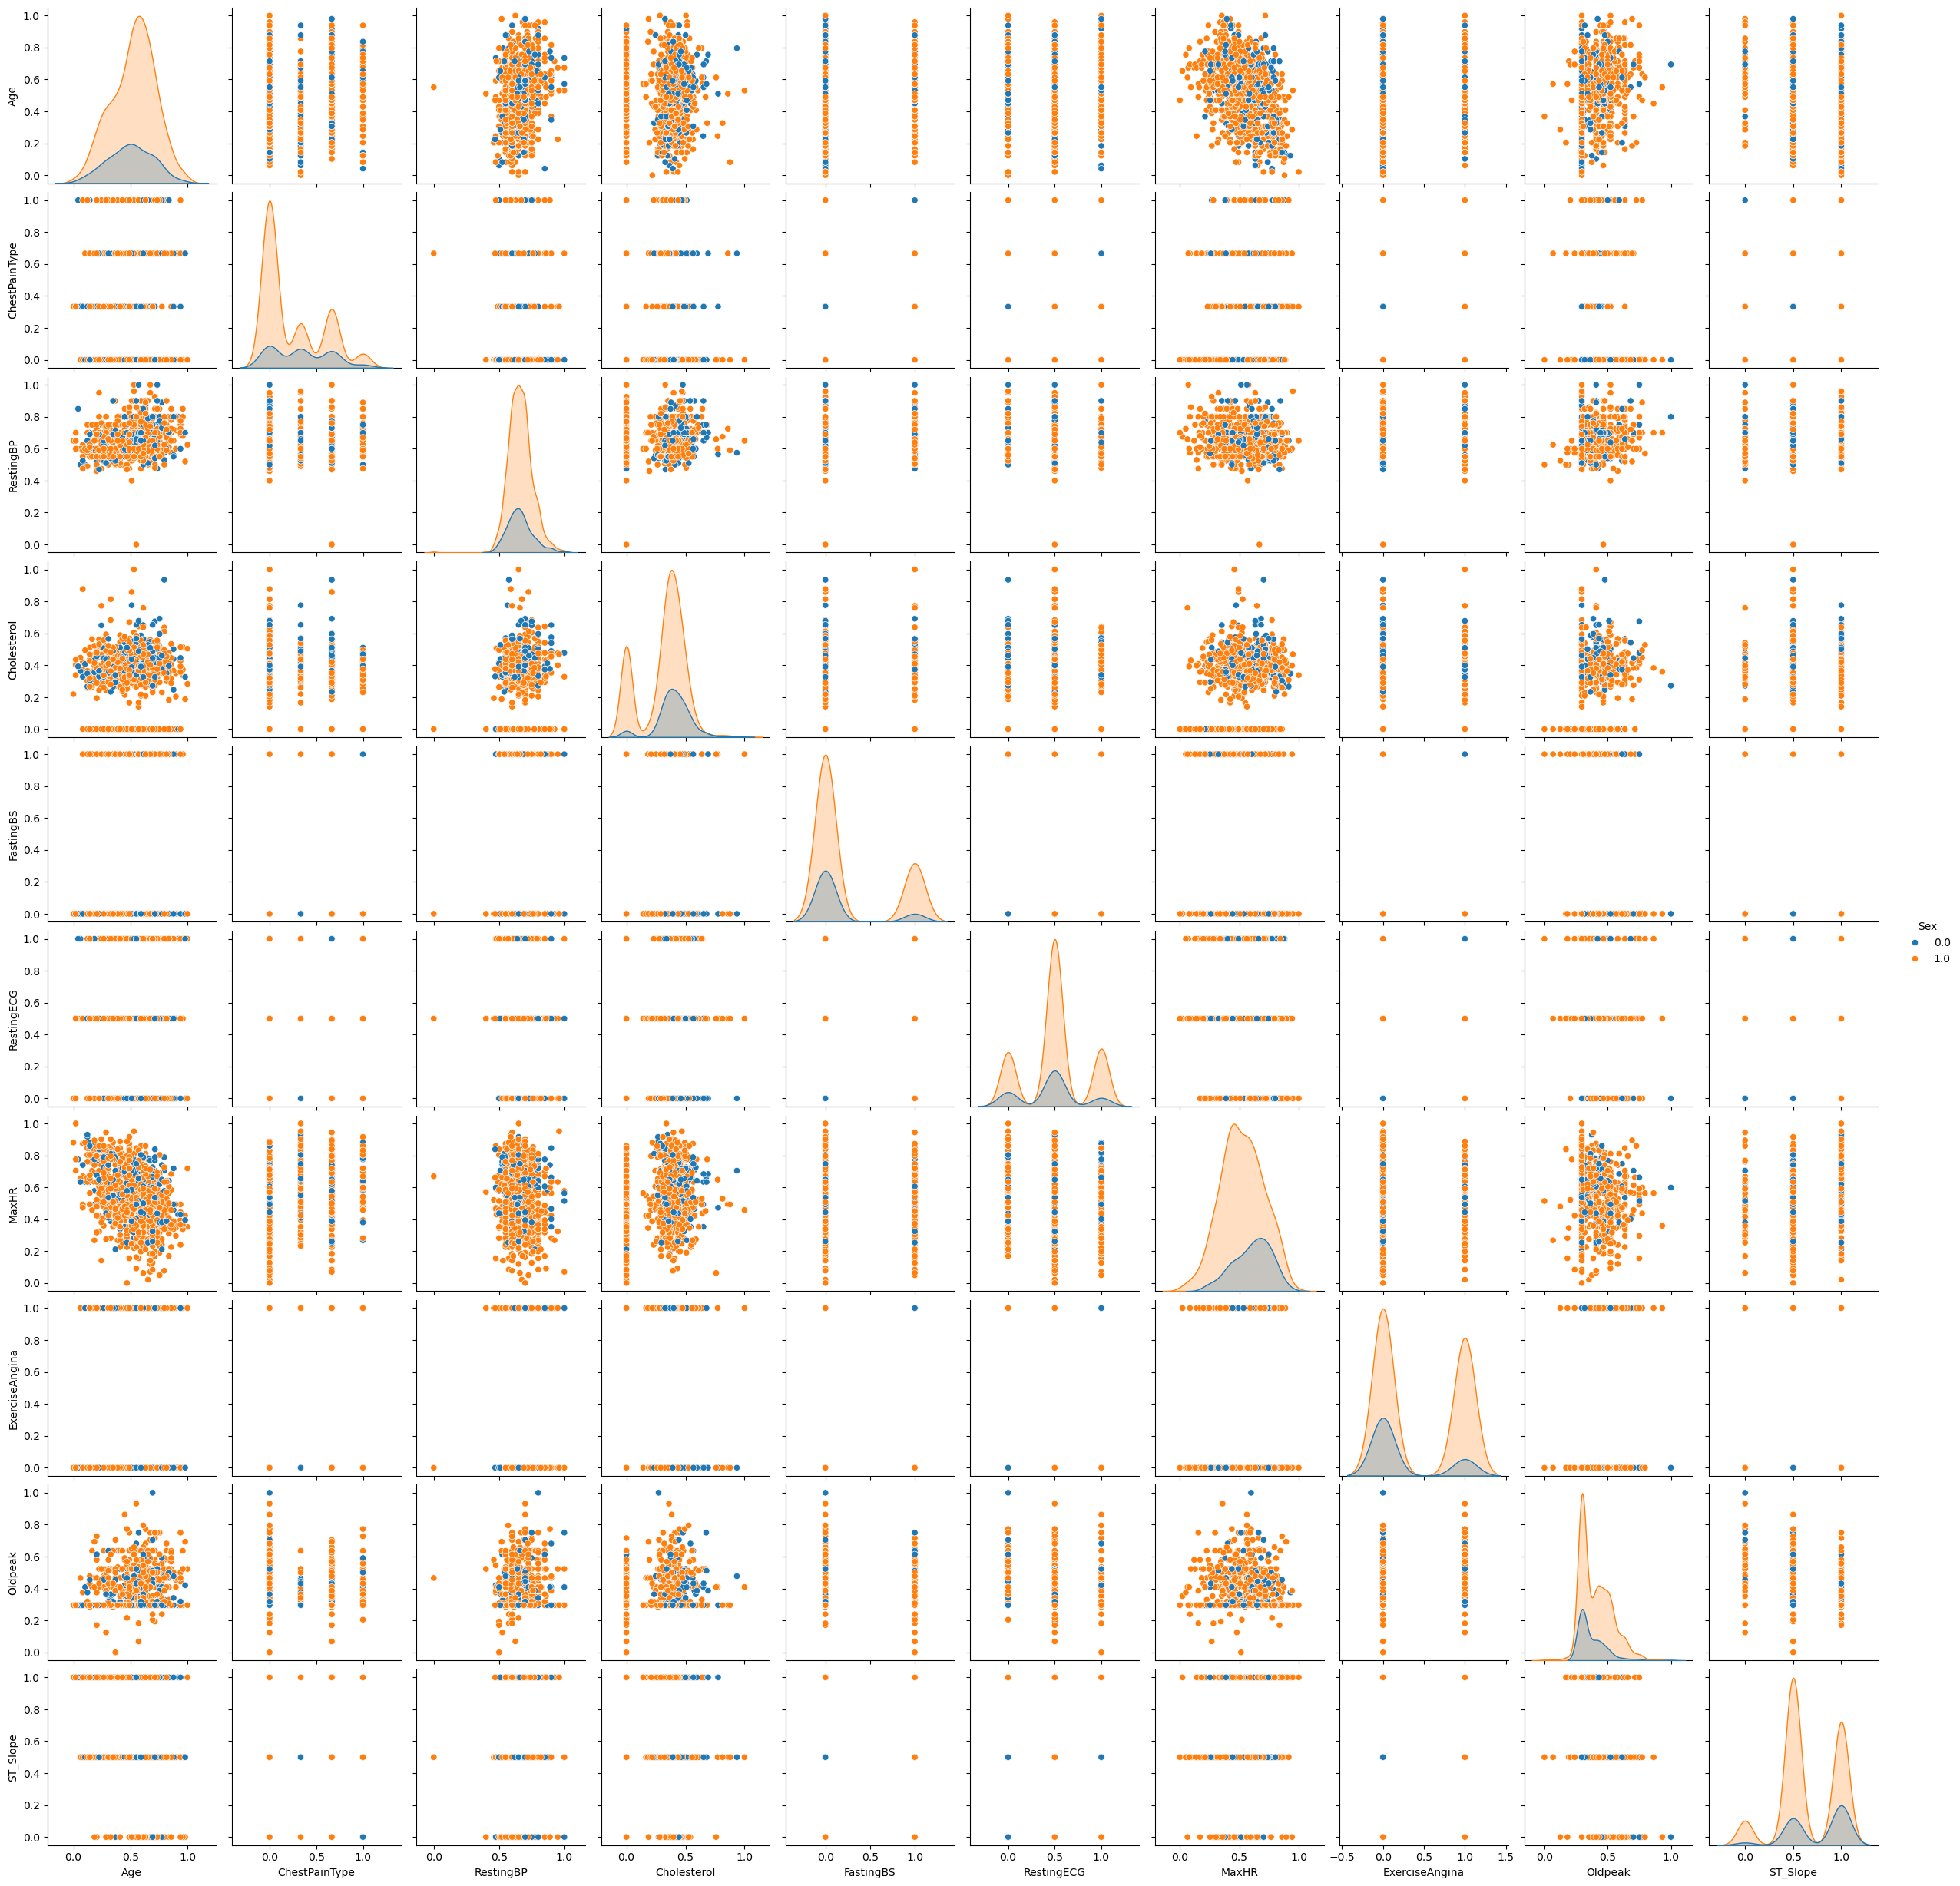

In [19]:
plt.figure(figsize=(20,20))
sns.pairplot(pd.DataFrame(dataset,columns=cols), diag_kind='kde', hue='Sex')
plt.show()

<Axes: ylabel='Count'>

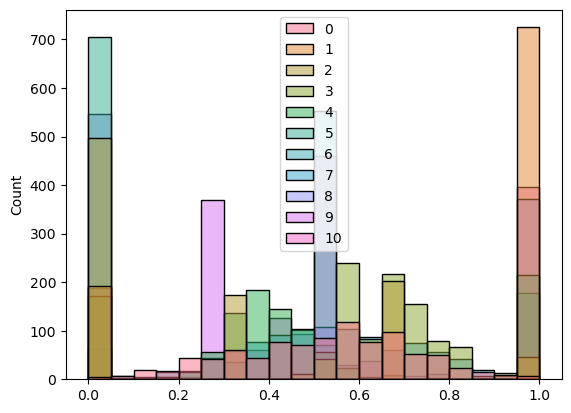

In [20]:
sns.histplot(dataset,bins=20)

As the data is now normalised, we start performing the classification

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(dataset,y,test_size=0.3,random_state=42)

### 1. KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
max_k=40
f1_scores=list()
error_rates=list()
from sklearn.metrics import f1_score,accuracy_score

In [24]:
for k in range(1,max_k):
    kn=KNeighborsClassifier(n_neighbors=k,weights='distance')
    kn.fit(X_train,y_train)
    y_predicted=kn.predict(X_test)

    f1_scores.append((k,round(f1_score(y_test,y_predicted),4)))
    error=1-round(accuracy_score(y_test,y_predicted),4)
    error_rates.append((k,error))

f1_results=pd.DataFrame(f1_scores,columns=['K','F1 Score'])
error_results=pd.DataFrame(error_rates,columns=['K','Error Rates'])

Text(0.5, 1.0, 'K vs F1 score')

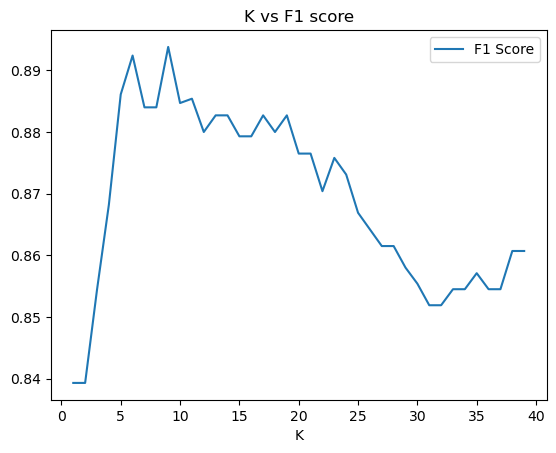

In [25]:
f1_results.set_index('K').plot()
plt.title('K vs F1 score')

Text(0.5, 1.0, 'K vs error')

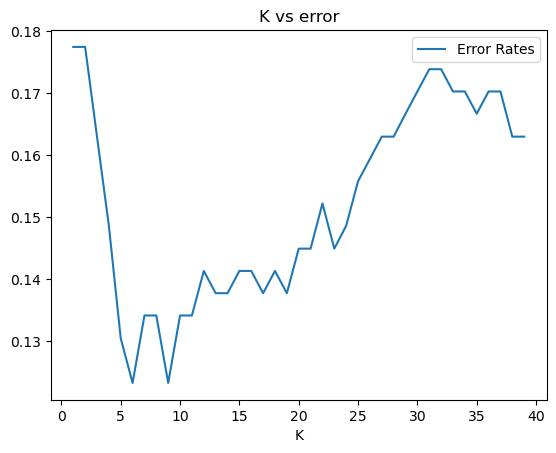

In [26]:
error_results.set_index('K').plot()
plt.title('K vs error')

We can see that for K=5, we get the minimum error and F1_Score. So we consider only this model for further evaluation

In [29]:
kn=KNeighborsClassifier(n_neighbors=5,weights='distance')
kn.fit(X_train,y_train)
y_predicted=kn.predict(X_test)

In [31]:
accuracy_knn=accuracy_score(y_test,y_predicted)
accuracy_knn

0.8695652173913043

### 2. Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [33]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test,dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73       112
           1       0.84      0.73      0.78       164

    accuracy                           0.76       276
   macro avg       0.76      0.76      0.75       276
weighted avg       0.77      0.76      0.76       276



In [36]:
param_grid={'max_depth':range(1,dt.tree_.max_depth,2),
           'max_features':range(1,len(dt.feature_importances_)+1)}

GSCV=GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid=param_grid,scoring='accuracy',n_jobs=-1)

In [37]:
GSCV.fit(X_train,y_train)

print(classification_report(y_test,GSCV.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       112
           1       0.89      0.82      0.85       164

    accuracy                           0.83       276
   macro avg       0.83      0.84      0.83       276
weighted avg       0.84      0.83      0.83       276



In [41]:
accuracy_tree=accuracy_score(y_test,GSCV.predict(X_test))
accuracy_tree

0.8333333333333334

### 3. Gradient Boosting

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

error_list=list()
trees=[15, 25, 50, 100, 200,400]

for tree in trees:
    GBC=GradientBoostingClassifier(n_estimators=tree,random_state=42)
    print(f'Fitting model with {tree} trees')
    GBC.fit(X_train, y_train)
    y_pred = GBC.predict(X_test)

    error=1-accuracy_score(y_test,GBC.predict(X_test))
    error_list.append((tree,error))

Fitting model with 15 trees
Fitting model with 25 trees
Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 200 trees
Fitting model with 400 trees


In [54]:
errors=pd.DataFrame(error_list,columns=['Tree','Error'])
errors

,Tree,Error
0,15,0.141304
1,25,0.141304
2,50,0.137681
3,100,0.141304
4,200,0.137681
5,400,0.137681


Text(0.5, 1.0, 'Error vs Tree')

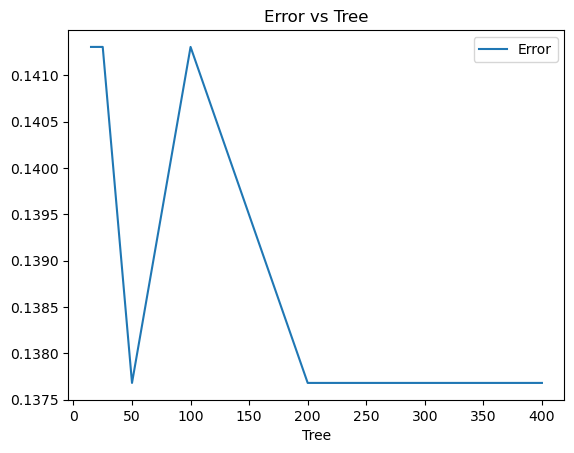

In [55]:
errors.set_index('Tree').plot()
plt.title('Error vs Tree')

We see that for 200 trees the error becomes minimum and remains so. So we consider this for final accuracy evaluation

In [57]:
GBC=GradientBoostingClassifier(n_estimators=200,random_state=42)
GBC.fit(X_train,y_train)
accuracy_boost=accuracy_score(y_test,GBC.predict(X_test))
accuracy_boost

0.8623188405797102

### Plot of all accuracy

In [60]:
accuracy={
    "Model": ["KNN", "Decision Tree", "Gradient Boosting Classifier"],
    "Accuracy": [accuracy_knn,accuracy_tree,accuracy_boost]
}

df=pd.DataFrame(accuracy)
df.head()

,Model,Accuracy
0,KNN,0.869565
1,Decision Tree,0.833333
2,Gradient Boosting Classifier,0.862319


<Axes: xlabel='Model'>

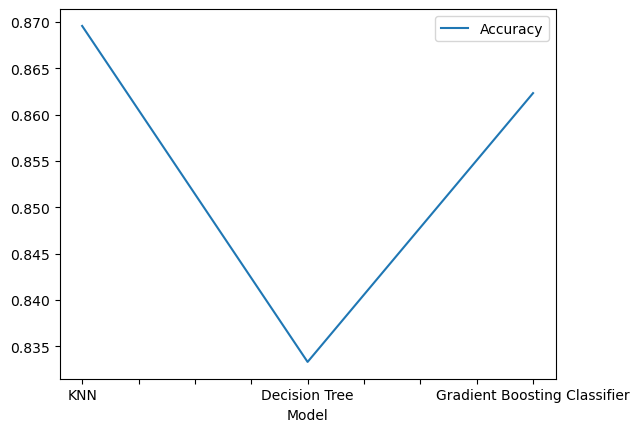

In [62]:
df.set_index('Model').plot()

We can now conclude that the KNN model with 5 nearest neighbours is the best fit for this problem

# 4. Insights and key findings


The primary objective of this analysis was to predict the to predict the likelihood of cardiovascular disease (CVD) or heart disease in individuals based on the provided features, using Classification technique of machine learning.

To achieve this, we performed several computations to ensure the data was prepared properly for modeling, including handling missing values, label encoding, and feature scaling. We employed multiple classification methodologies, including K Nearest Neighbors, Decision Tree and Gradient Boosting,and to compared their performance in predicting the likelihood.

1. Data Preprocessing -

The data contained no NaN data and missing values in all the attributes initially. The attributes of -'Sex','ChestPainType','RestingECG','ExerciseAngina', and 'ST_Slope' were categorical in nature. So we performed Label Encoding to these attributes for further computations.

On visualizing the boxplot and also the description of all the data, we realsied that there was a need to standardise the data. Therefore, we used the MinMaxScaler to normalise the data around the 0-index, which can be visualized by the pairplots.

2. Models -

We evaluated the performance of the models after performing the train-test split on the scaled data. 

KNN achieved the highest accuracy with k=5, suggesting that this model is effective for classifying individuals at risk for CVD based on their similarities to others in the dataset.

Decision trees usually provide an interpretable model, which may show the feature split decisions (e.g., "Is age greater than 50?" or "Is cholesterol greater than 200?"). However, they are more prone to overfitting reducing the accuracy compared to other models, which we saw here.

Gradient boosting combines weak learners to build a robust model. It performed well by addressing errors from previous iterations, though it can be computationally expensive.

3. Model Interpretation and Performance -

Since KNN performs the best, it is likely that the dataset contains patterns based on similarity among individuals. KNN, as we know works well for datasets where there is a natural grouping or clustering of individuals with similar characteristics.

Decision Trees and Gradient Boosting are also performing well, and their combination could result in higher predictive accuracy, but KNN remains the best as per this analysis

In conclusion, we can say that the analysis effectively predicted the likelihood of cardio-vascular diseases by leveraging machine learning models, particularly KNN. The analysis reveals important insights into the prediction of cardiovascular diseases. It highlights the significance of certain features like age, cholesterol, and blood pressure while providing a pathway for public health initiatives focused on reducing CVD-related deaths through early intervention and targeted prevention strategies.


# 5. Next Steps


(A) The insights gained from the machine learning model can help in prioritizing public health interventions. For instance, individuals with high cholesterol, hypertension, or a history of chest pain may benefit from more frequent screenings and lifestyle interventions.

(B) Public health strategies can be tailored to target the most at-risk populations by focusing on the most significant predictors of cardiovascular disease.

(C) Better Models - While KNN has the highest accuracy, tuning the hyperparameters for Gradient Boosting or experimenting with ensemble methods (e.g., stacking) could improve overall performance.

(D) Feature Engineering - We can create new features by combining existing ones, like interaction terms between Cholesterol and Age, or MaxHR and Oldpeak, for better analysis. Also, we can include additional features such as family history of CVD, lifestyle factors (e.g., smoking, exercise), and diet if available, to understand the problem better.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
